# Getting started

Once you've chosen your scenario from the README, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Scenario and Problem Statement

I've chosen to do Scenario 1. The Iowa State Legislature is considering a change to the liquor tax rate, so they need to know what the projected sales are for the rest of 2016.

In [1]:
import pandas as pd
import numpy as np

In [2]:
liq = pd.read_csv("https://data.iowa.gov/api/views/m3tr-qhgy/rows.csv?accessType=DOWNLOAD", dtype = {'Store Number': str, 'Zip Code': str, 'Category': str, 'Vendor Number': str, 'Item Number': str})

# Doing exploration, recording, mining, and refining iteratively, so all in one section

## Explore the data

Perform EDA and Viz, such as histograms of transaction totals, bottles sold, etc.

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

## Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

## Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [44]:
liq.head()

date store_number          city zip_code category  pack  \
0 2015-11-20         2191        keokuk    52632      NaN     6   
1 2015-11-21         2205      clarinda    51632      NaN     6   
2 2015-11-16         3549  fort madison    52627      NaN    20   
3 2015-11-04         2513     iowa city    52240      NaN     3   
4 2015-11-17         3942        toledo    52342      NaN    20   

   bottle_volume_ml  bottles_sold  volume_sold_liters  \
0               750             6                4.50   
1               750            12                9.00   
2               150             2                0.30   
3              1750             3                5.25   
4               150             2                0.30   

   state_bottle_retail_usd  sale_usd   county  
0                    27.14    162.84      lee  
1                    27.14    325.68     page  
2                     9.60     19.20      lee  
3                    53.34    160.02  johnson  
4                     9.60     19.20     tama

In [45]:
#for ease and to allow dot notation, renaming columns
liq.columns = liq.columns.str.lower().str.replace(' ', '_').str.replace('(', "").str.replace(')', "")
liq.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'category', u'pack',
       u'bottle_volume_ml', u'bottles_sold', u'volume_sold_liters',
       u'state_bottle_retail_usd', u'sale_usd', u'county'],
      dtype='object')

In [46]:
#getting rid of some info that I know will not be useful: invoice/item number, store name, address, store location
liq.drop(['invoice/item_number', 'store_name', 'address', 'store_location'], axis=1, inplace=True)

ValueError: labels ['invoice/item_number' 'store_name' 'address' 'store_location'] not contained in axis

In [47]:
liq.describe(include='all')

date store_number        city  zip_code  category  \
count              10286538     10286538    10286175  10286130  10284545   
unique                 1119         1722         403       439       104   
top     2014-12-29 00:00:00         2633  des moines     52402   1031080   
freq                  15996        91900      914807    252142   1265974   
first   2012-01-03 00:00:00          NaN         NaN       NaN       NaN   
last    2016-10-31 00:00:00          NaN         NaN       NaN       NaN   
mean                    NaN          NaN         NaN       NaN       NaN   
std                     NaN          NaN         NaN       NaN       NaN   
min                     NaN          NaN         NaN       NaN       NaN   
25%                     NaN          NaN         NaN       NaN       NaN   
50%                     NaN          NaN         NaN       NaN       NaN   
75%                     NaN          NaN         NaN       NaN       NaN   
max                     NaN          NaN         NaN       NaN       NaN   

                pack  bottle_volume_ml  bottles_sold  volume_sold_liters  \
count   1.028654e+07      1.028654e+07  1.028654e+07        1.028654e+07   
unique           NaN               NaN           NaN                 NaN   
top              NaN               NaN           NaN                 NaN   
freq             NaN               NaN           NaN                 NaN   
first            NaN               NaN           NaN                 NaN   
last             NaN               NaN           NaN                 NaN   
mean    1.217944e+01      9.318514e+02  9.461806e+00        8.729611e+00   
std     7.370361e+00      6.484563e+02  2.428039e+01        2.938021e+01   
min     1.000000e+00      0.000000e+00  0.000000e+00        0.000000e+00   
25%     6.000000e+00      7.500000e+02  2.000000e+00        1.500000e+00   
50%     1.200000e+01      7.500000e+02  6.000000e+00        4.500000e+00   
75%     1.200000e+01      1.000000e+03  1.200000e+01        1.050000e+01   
max     3.360000e+02      3.780000e+05  1.500000e+04        1.500000e+04   

        state_bottle_retail_usd      sale_usd    county  
count              1.028653e+07  1.028653e+07  10285464  
unique                      NaN           NaN        99  
top                         NaN           NaN      polk  
freq                        NaN           NaN   1860256  
first                       NaN           NaN       NaN  
last                        NaN           NaN       NaN  
mean               1.438223e+01  1.250013e+02       NaN  
std                1.737255e+01  4.227005e+02       NaN  
min                0.000000e+00  0.000000e+00       NaN  
25%                         NaN           NaN       NaN  
50%                         NaN           NaN       NaN  
75%                         NaN           NaN       NaN  
max                1.152000e+04  2.541000e+05       NaN

In [48]:
#checking for nulls
for col in liq.columns:
    print col, liq[liq[col].isnull()].shape[0]

date 0
store_number 0
city 363
zip_code 408
category 1993
pack 0
bottle_volume_ml 0
bottles_sold 0
volume_sold_liters 0
state_bottle_retail_usd 10
sale_usd 10
county 1074


In [49]:
#checking if number of counties matches the number of count numbers
print len(liq.county_number.astype(str).unique())
len(liq.county.astype(str).unique())

AttributeError: 'DataFrame' object has no attribute 'county_number'

In [50]:
pd.options.display.max_rows=100
pd.pivot_table(liq, index=['county', 'county_number'], values='city', aggfunc='count')

KeyError: 'county_number'

In [51]:
#Due to capitalization differences, some counties appear twice. I will have to lowercase them all.
liq['county'] = liq['county'].str.lower()

In [52]:
pd.options.display.max_rows=110
pd.pivot_table(liq, index=['county', 'county_number'], values='city', aggfunc='count')

KeyError: 'county_number'

In [ ]:
# still some issues with the county names, so I have to manually recode some:
# buena vist/a
# cerro gord/o
# obrien / o'brien
# pottawatta/mie
liq.county[liq.county=='buena vist'] = 'buena vista'
liq.county[liq.county=='cerro gord'] = 'cerro gordo'
liq.county[liq.county=='obrien'] = 'o\'brien'
liq.county[liq.county=='pottawatta'] = 'pottawattamie'

In [ ]:
pd.pivot_table(liq, index=['county', 'county_number'], values='city', aggfunc='count')

In [ ]:
# now that all the county names have been fixed, I will drop the county column so I won't have to 
# re-match the numbers with the county names to share with stakeholders.
liq.drop('county_number', axis=1, inplace=True)

There are more missing values in 'category_name' than 'category', so I want to drop the 'category_name' column

In [ ]:
liq.drop('category_name', axis=1, inplace=True)

There are too many item names, item descriptions, and vendors to be useful, so I'm dropping those columns

In [ ]:
liq.drop(['item_number', 'item_description'], axis=1, inplace=True)
liq.drop(['vendor_name', 'vendor_number'], axis=1, inplace=True)

Volumes in liters and gallons are repetitive. Will eliminate gallons since it was created through converstion

In [ ]:
liq.drop('volume_sold_gallons', axis=1, inplace=True)

In [ ]:
liq.dtypes

In [ ]:
liq.state_bottle_cost_usd / liq.state_bottle_retail_usd

I can drop the liq.state_bottle_cost variable because it is always 2/3 of the liq.state_bottle_retail variable

In [ ]:
liq.drop('state_bottle_cost', axis=1, inplace=True)

In [ ]:
#do some type converstions
liq.date = pd.to_datetime(liq.date, format='%m/%d/%Y')
liq['state_bottle_retail_usd'] = liq.state_bottle_retail.str.strip('$').astype(float)
liq['sale_usd'] = liq.sale_dollars.str.strip('$').astype(float)
liq.drop(['state_bottle_retail', 'sale_dollars'], axis=1, inplace = True)
liq.dtypes

In [ ]:
#checking if some cities are listed more than once with different capitalizations.
cities = [str(c).lower() for c in liq.city.unique()]
from collections import Counter
cities_counts = Counter(cities)
for c in cities_counts:
    if cities_counts[c] != 1:
        print c, cities_counts[c]

I will have to .lower() all cities so that the Des Moine, DES MOINES and des moines would go together

In [53]:
liq['city'] = liq['city'].str.lower()

In [54]:
liq.head()

date store_number          city zip_code category  pack  \
0 2015-11-20         2191        keokuk    52632      NaN     6   
1 2015-11-21         2205      clarinda    51632      NaN     6   
2 2015-11-16         3549  fort madison    52627      NaN    20   
3 2015-11-04         2513     iowa city    52240      NaN     3   
4 2015-11-17         3942        toledo    52342      NaN    20   

   bottle_volume_ml  bottles_sold  volume_sold_liters  \
0               750             6                4.50   
1               750            12                9.00   
2               150             2                0.30   
3              1750             3                5.25   
4               150             2                0.30   

   state_bottle_retail_usd  sale_usd   county  
0                    27.14    162.84      lee  
1                    27.14    325.68     page  
2                     9.60     19.20      lee  
3                    53.34    160.02  johnson  
4                     9.60     19.20     tama

In [55]:
#I want to now see if each store has at least one row that names the county:
stores_with_nans = list(liq['store_number'][liq.county.isnull()].unique())
pd.pivot_table(liq[(liq.store_number.isin(stores_with_nans))], index='store_number', values='county', aggfunc='count')

store_number
5220    0
5256    0
5290    0
5305    0
5306    0
Name: county, dtype: int64

In [56]:
liqWithCounty = liq[['store_number', 'county']][liq.county.notnull()]

In [57]:
#checking to see if each store only has one county associated with it.
liqWithCounty_ = liqWithCounty.drop_duplicates()

In [58]:
liqWithCounty_.store_number.value_counts()

5105    1
3725    1
3654    1
3721    1
3722    1
3723    1
4930    1
4838    1
4932    1
4933    1
4682    1
4935    1
4680    1
4937    1
4938    1
3682    1
4833    1
4832    1
4523    1
4834    1
4521    1
4689    1
4446    1
2518    1
4444    1
3726    1
4448    1
2515    1
4447    1
2191    1
4808    1
4715    1
5028    1
4527    1
2584    1
2583    1
2582    1
5021    1
5020    1
2422    1
5022    1
5025    1
5024    1
5027    1
5026    1
4440    1
4441    1
4442    1
4443    1
3728    1
4445    1
4633    1
2514    1
2517    1
5200    1
       ..
4319    1
4488    1
4489    1
2260    1
5216    1
2838    1
2837    1
2836    1
2835    1
3390    1
3393    1
5268    1
5221    1
3013    1
4683    1
3016    1
4333    1
4934    1
2161    1
4681    1
4260    1
4188    1
4262    1
4936    1
4265    1
4687    1
4267    1
4181    1
2839    1
5225    1
2106    1
5250    1
4662    1
9014    1
9017    1
9010    1
9013    1
5228    1
9018    1
5229    1
5252    1
5253    1
5251    1
2638    1


In [59]:
# investigating 4944 because it had two counties associated with it:
liq[liq.store_number == '4944']

date store_number         city zip_code category  pack  \
4924     2014-01-21         4944  martensdale    50160  1031080     6   
12860    2015-08-13         4944  martensdale    50160  1081700     6   
41739    2013-10-17         4944  martensdale    50160  1031200     6   
42043    2014-05-13         4944  martensdale    50160  1011300    12   
60277    2014-06-03         4944  martensdale    50160  1012100     6   
69882    2014-08-05         4944  martensdale    50160  1081600     1   
86162    2015-09-03         4944  martensdale    50160  1031080    24   
97140    2013-10-17         4944  martensdale    50160  1012100    10   
107333   2014-02-25         4944  martensdale    50160  1081330    24   
168597   2013-10-17         4944  martensdale    50160  1012100    12   
176161   2013-10-17         4944  martensdale    50160  1031200    12   
176616   2013-10-17         4944  martensdale    50160  1022100    12   
178539   2013-10-17         4944  martensdale    50160  1012100    12   
182152   2015-05-28         4944  martensdale    50160  1081700     6   
199014   2014-02-25         4944  martensdale    50160  1081600    12   
219915   2015-07-23         4944  martensdale    50160  1031200     6   
243517   2015-09-03         4944  martensdale    50160  1081700     6   
245210   2015-09-03         4944  martensdale    50160  1012100    10   
317344   2015-11-19         4944  martensdale    50160  1062310     6   
328639   2013-10-17         4944  martensdale    50160  1012200    12   
337309   2015-02-26         4944  martensdale    50160  1031080    24   
414423   2015-04-23         4944  martensdale    50160  1082900    12   
421517   2015-09-24         4944  martensdale    50160  1031080    12   
468688   2015-02-26         4944  martensdale    50160  1011300    12   
592711   2013-10-17         4944  martensdale    50160  1012200    12   
595402   2014-08-05         4944  martensdale    50160  1012100     6   
646935   2013-12-28         4944  martensdale    50160  1062310    12   
671418   2013-10-17         4944  martensdale    50160  1081600    12   
739883   2013-10-17         4944  martensdale    50160  1062310     6   
741675   2015-05-28         4944  martensdale    50160  1031080    24   
766704   2014-03-25         4944  martensdale    50160  1081900    12   
784179   2015-09-03         4944  martensdale    50160  1081330    24   
799829   2015-09-24         4944  martensdale    50160  1041100    12   
813561   2015-08-13         4944  martensdale    50160  1031080     6   
818311   2013-10-17         4944  martensdale    50160  1081600    12   
836158   2014-01-21         4944  martensdale    50160  1031080    12   
855714   2015-05-28         4944  martensdale    50160  1031200    12   
892048   2015-09-03         4944  martensdale    50160  1032080    12   
892947   2013-12-28         4944  martensdale    50160  1081600    12   
919533   2015-11-19         4944  martensdale    50160  1062200    12   
945723   2015-07-23         4944  martensdale    50160  1041150    12   
949901   2014-11-13         4944  martensdale    50160  1031200     6   
964807   2014-09-11         4944  martensdale    50160  1062300    12   
974103   2015-11-19         4944  martensdale    50160  1022100    12   
978519   2015-08-13         4944  martensdale    50160  1012100    10   
982506   2014-09-11         4944  martensdale    50160  1081600     1   
1104489  2015-05-28         4944  martensdale    50160  1081700     6   
1134455  2014-01-21         4944  martensdale    50160  1081700     6   
1142665  2014-03-25         4944  martensdale    50160  1011200    12   
1146118  2013-12-03         4944  martensdale    50160  1031080    12   
1162360  2013-12-28         4944  martensdale    50160  1012100     6   
1174317  2014-08-05         4944  martensdale    50160  1031080     6   
1177507  2014-12-23         4944  martensdale    50160  1031080     6   
1219265  2015-07-23         4944  martensdale    50160  1012100    24   


Did some investigating and it appears Martensdale city is in Warren County, which is where this store was listed until September 2016, so I will re-label this store into Warren County for all cases.

In [60]:
liqWithCounty_[liqWithCounty_.store_number == '4944']

store_number  county
4924         4944  warren

In [64]:
#merging in
liqWithCounty_.drop(10052182, inplace=True)

ValueError: labels [10052182] not contained in axis

In [65]:
pd.merge(liq, liqWithCounty_, on='store_number', how='left')[['county_x', 'county_y']]

county_x       county_y
0                   lee            lee
1                  page           page
2                   lee            lee
3               johnson        johnson
4                  tama           tama
5                   ida            ida
6            black hawk     black hawk
7                  tama           tama
8             muscatine      muscatine
9              harrison       harrison
10              o'brien        o'brien
11                 polk           polk
12                 cass           cass
13                  ida            ida
14              clinton        clinton
15              dubuque        dubuque
16           black hawk     black hawk
17             crawford       crawford
18               monona         monona
19               dallas         dallas
20                scott          scott
21               marion         marion
22                 polk           polk
23                henry          henry
24             buchanan       buchanan
25              kossuth        kossuth
26               shelby         shelby
27                 polk           polk
28              kossuth        kossuth
29               hardin         hardin
30               bremer         bremer
31                 polk           polk
32                 linn           linn
33                 linn           linn
34                  ida            ida
35           black hawk     black hawk
36             woodbury       woodbury
37           black hawk     black hawk
38               jasper         jasper
39           black hawk     black hawk
40             marshall       marshall
41                 page           page
42                 polk           polk
43             ringgold       ringgold
44               hardin         hardin
45        pottawattamie  pottawattamie
46              o'brien        o'brien
47           washington     washington
48                scott          scott
49                 cass           cass
50               marion         marion
51             marshall       marshall
52              johnson        johnson
53            muscatine      muscatine
54              webster        webster
...                 ...            ...
10286483        guthrie        guthrie
10286484        guthrie        guthrie
10286485        guthrie        guthrie
10286486        guthrie        guthrie
10286487        guthrie        guthrie
10286488        guthrie        guthrie
10286489        guthrie        guthrie
10286490        guthrie        guthrie
10286491        guthrie        guthrie
10286492        guthrie        guthrie
10286493        guthrie        guthrie
10286494        guthrie        guthrie
10286495        guthrie        guthrie
10286496        guthrie        guthrie
10286497        guthrie        guthrie
10286498        guthrie        guthrie
10286499        guthrie        guthrie
10286500        guthrie        guthrie
10286501        guthrie        guthrie
10286502        guthrie        guthrie
10286503        guthrie        guthrie
10286504        guthrie        guthrie
10286505        guthrie        guthrie
10286506        guthrie        guthrie
10286507        guthrie        guthrie
10286508        guthrie        guthrie
10286509        guthrie        guthrie
10286510        guthrie        guthrie
10286511        guthrie        guthrie
10286512        guthrie        guthrie
10286513        guthrie        guthrie
10286514        guthrie        guthrie
10286515        guthrie        guthrie
10286516        guthrie        guthrie
10286517        guthrie        guthrie
10286518        guthrie        guthrie
10286519        guthrie        guthrie
10286520        guthrie        guthrie
10286521        guthrie        guthrie
10286522        guthrie        guthrie
10286523        guthrie        guthrie
10286524        guthrie        guthrie
10286525        guthrie        guthrie
10286526        guthrie        guthrie
10286527        guthrie        guthrie
10286528        guthrie        guthri

In [66]:
liq = pd.merge(liq, liqWithCounty_, on='store_number', how='left')

In [67]:
print len(liq.county_x[liq.county_x.isnull()])
len(liq.county_y[liq.county_y.isnull()])

1074


1074

In [72]:
# I successfully reduced the number of lines with a missing county from 77166 to 1074. 
# I will now get rid of the old column in place of the new one
liq.drop('county_x', axis=1, inplace = True)
liq = liq.rename(columns={'county_y':'county'})

ValueError: labels ['county_x'] not contained in axis

In [73]:
#now I want to create a column for each year and month so I can use them to create columns that will 
# sum to totals by month.
liq['month'] = liq.date.apply(lambda d: d.month)
liq['year'] = liq.date.apply(lambda d: d.year)
liq[['date' , 'month', 'year']].sample(frac=.0001) #check if it worked

date  month  year
6922448  2014-07-29      7  2014
8316169  2015-12-30     12  2015
434963   2013-02-28      2  2013
399343   2012-12-04     12  2012
4902225  2013-06-06      6  2013
127493   2013-12-27     12  2013
4257134  2014-12-10     12  2014
7481742  2015-08-31      8  2015
6420828  2012-04-25      4  2012
5766748  2015-07-15      7  2015
3428675  2013-05-08      5  2013
8721017  2016-02-22      2  2016
4984328  2013-04-03      4  2013
5532757  2015-05-11      5  2015
8496939  2016-01-13      1  2016
9246234  2016-05-18      5  2016
7100054  2012-05-25      5  2012
24742    2012-11-08     11  2012
5398844  2013-09-25      9  2013
1509011  2014-10-21     10  2014
6622855  2014-08-13      8  2014
2280803  2015-02-16      2  2015
8536252  2016-01-25      1  2016
1113408  2013-05-21      5  2013
8760633  2016-03-01      3  2016
3270788  2014-01-14      1  2014
1447098  2013-02-13      2  2013
7800803  2014-02-04      2  2014
7163557  2015-07-16      7  2015
6194830  2013-07-24      7  2013
9793184  2016-08-09      8  2016
1255847  2012-01-16      1  2012
2716486  2015-10-22     10  2015
9684680  2016-07-27      7  2016
9970996  2016-09-12      9  2016
3355469  2013-12-09     12  2013
7797319  2014-10-21     10  2014
9918559  2016-09-01      9  2016
4580566  2014-06-04      6  2014
10065831 2016-09-26      9  2016
551092   2012-08-21      8  2012
2102917  2014-08-27      8  2014
2424122  2014-12-19     12  2014
9374329  2016-06-08      6  2016
3681312  2015-06-09      6  2015
1251840  2013-08-05      8  2013
9121493  2016-04-28      4  2016
9863812  2016-08-18      8  2016
8716253  2016-02-22      2  2016
3635074  2015-02-17      2  2015
467254   2015-01-20      1  2015
5429415  2012-04-03      4  2012
85093    2014-06-03      6  2014
390976   2014-09-02      9  2014
806464   2015-07-27      7  2015
...             ...    ...   ...
7173759  2014-07-16      7  2014
4517146  2014-06-12      6  2014
6540213  2015-01-16      1  2015
1602697  2013-06-12      6  2013
5674342  2013-01-03      1  2013
9784882  2016-08-08      8  2016
6475731  2013-03-21      3  2013
1224046  2015-05-11      5  2015
3613767  2012-03-21      3  2012
4241334  2012-05-14      5  2012
277496   2013-02-21      2  2013
9168078  2016-05-05      5  2016
9356714  2016-06-06      6  2016
8790102  2016-03-10      3  2016
6124893  2012-04-02      4  2012
854571   2013-08-08      8  2013
8528689  2016-01-15      1  2016
7745804  2013-03-07      3  2013
1048750  2012-01-03      1  2012
4448190  2014-04-01      4  2014
8642232  2016-02-09      2  2016
3355586  2014-02-25      2  2014
7711859  2012-04-02      4  2012
5831787  2013-06-06      6  2013
4828689  2014-06-12      6  2014
7478227  2013-06-12      6  2013
5571799  2014-06-02      6  2014
378017   2014-08-07      8  2014
2750700  2013-08-19      8  2013
6421902  2014-05-20      5  2014
3660984  2014-03-13      3  2014
10061401 2016-09-26      9  2016
148623   2012-09-19      9  2012
6382213  2013-08-01      8  2013
2037755  2014-08-06      8  2014
1392887  2013-01-14      1  2013
1694544  2012-07-24      7  2012
1715253  2014-03-19      3  2014
8455110  2016-01-11      1  2016
5363192  2015-01-20      1  2015
2003016  2012-07-06      7  2012
1768310  2013-04-02      4  2013
7052951  2013-09-25      9  2013
7121570  2012-01-31      1  2012
1336671  2013-01-02      1  2013
5598842  2015-03-19      3  2015
8817977  2016-03-09      3  2016
7644800  2012-03-28      3  2012
6931506  2015-02-11      2  2015
4667306  2013-09-17      9  2013
3099851  2013-01-16      1  2013
9741374  2016-08-01      8  2016
9544800  2016-07-06      7  2016
8697413  2016-02-17      2  2016
10203331 2016-10-18     10  2016

[1029 rows x 3 columns]

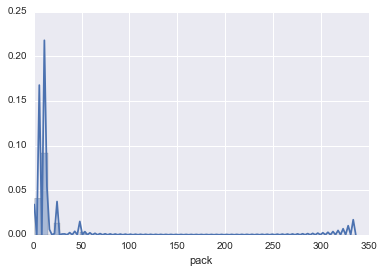

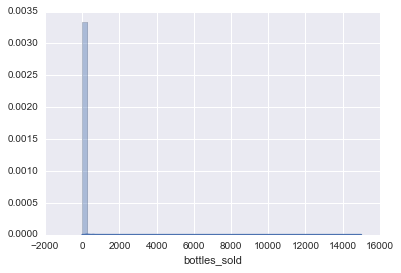

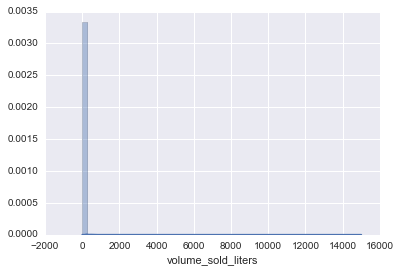

KeyError: 'state_bottle_cost_usd'

In [74]:
# exploring distributions of numerical data before I group by store number
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for i in [ 'pack',
 'bottle_volume_ml',
 'bottles_sold',
 'volume_sold_liters',
 'state_bottle_cost_usd',
 'state_bottle_retail_usd',
 'sale_usd',]:
    sns.distplot(liq[i][liq[i].notnull()])
    plt.show()

Outliers appear to be making it impossible to see the distributions...

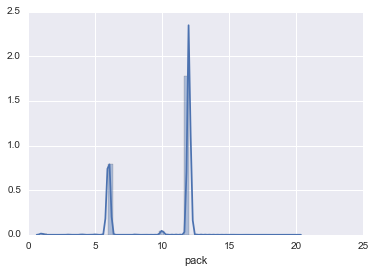

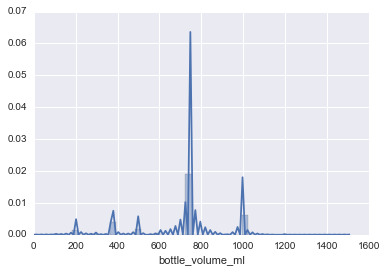

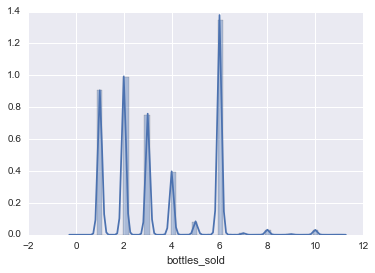

KeyError: 'state_bottle_cost_usd'

In [75]:
for i in [ 'pack',
 'bottle_volume_ml',
 'bottles_sold',
 'volume_sold_liters',
 'state_bottle_cost_usd',
 'state_bottle_retail_usd',
 'sale_usd',]:
    sns.distplot(liq[i][liq[i] < liq[i].quantile(.90)])
    plt.show()

- "packs" seem to be mostly 6-packs and 12-packs, with some exceptions
- bottle_volume also seem to be mostly 200, 400, 800, and 1000 ml (or around there) with only a few execptions
- bottles sold seem to be mostly 1, 2, 3, 4, 5, or 6 (like a six-pack, I'm guessing)
- total liters sold has some really randomly distributed data, mostly under 12 liters in total.
- state_bottle_cost and state_retail_cost seem like a fairly normal distribution outside of the extreme outliers. state bottle cost seems centered around about 7 or 8, and retail around 11 or 12 (excluding outliers)
- sale_usd's distribution shows that the lower sales (under \$20) are most common, with each total becoming less and less common with the exception of a peak around \$60.

In [76]:
pd.options.display.max_columns = 100
liq_q1_2012 = pd.pivot_table(liq[(liq.month <=3) & (liq.year == 2012)], 
               index = ['store_number', 'city', 'zip_code', 'county'], 
               values = ['pack', 'bottle_volume_ml', 'bottles_sold', 'volume_sold_liters', 'state_bottle_retail_usd', 'sale_usd'],
              aggfunc = {'pack': np.mean,
                        'bottle_volume_ml': np.mean,
                        'bottles_sold': (np.mean),
                        'volume_sold_liters': (np.mean),
                        'sale_usd': 'sum',
                        'state_bottle_retail_usd':np.mean})
liq_q1_2013 = pd.pivot_table(liq[(liq.month <=3) & (liq.year == 2013)], 
               index = ['store_number', 'city', 'zip_code', 'county'], 
               values = ['pack', 'bottle_volume_ml', 'bottles_sold', 'volume_sold_liters', 'state_bottle_retail_usd', 'sale_usd'],
              aggfunc = {'pack': np.mean,
                        'bottle_volume_ml': np.mean,
                        'bottles_sold': (np.mean),
                        'volume_sold_liters': (np.mean),
                        'sale_usd': 'sum',
                        'state_bottle_retail_usd':np.mean})
liq_q1_2014 = pd.pivot_table(liq[(liq.month <=3) & (liq.year == 2014)], 
               index = ['store_number', 'city', 'zip_code', 'county'], 
               values = ['pack', 'bottle_volume_ml', 'bottles_sold', 'volume_sold_liters', 'state_bottle_retail_usd', 'sale_usd'],
              aggfunc = {'pack': np.mean,
                        'bottle_volume_ml': np.mean,
                        'bottles_sold': (np.mean),
                        'volume_sold_liters': (np.mean),
                        'sale_usd': 'sum',
                        'state_bottle_retail_usd':np.mean})
liq_q1_2015 = pd.pivot_table(liq[(liq.month <=3) & (liq.year == 2015)], 
               index = ['store_number', 'city', 'zip_code', 'county'], 
               values = ['pack', 'bottle_volume_ml', 'bottles_sold', 'volume_sold_liters', 'state_bottle_retail_usd', 'sale_usd'],
              aggfunc = {'pack': np.mean,
                        'bottle_volume_ml': np.mean,
                        'bottles_sold': (np.mean),
                        'volume_sold_liters': (np.mean),
                        'sale_usd': 'sum',
                        'state_bottle_retail_usd':np.mean})
liq_q1_2016 = pd.pivot_table(liq[(liq.month <=3) & (liq.year == 2016)], 
               index = ['store_number', 'city', 'zip_code', 'county'], 
               values = ['pack', 'bottle_volume_ml', 'bottles_sold', 'volume_sold_liters', 'state_bottle_retail_usd', 'sale_usd'],
              aggfunc = {'pack': np.mean,
                        'bottle_volume_ml': np.mean,
                        'bottles_sold': (np.mean),
                        'volume_sold_liters': (np.mean),
                        'sale_usd': 'sum',
                        'state_bottle_retail_usd':np.mean})

In [ ]:
#AT - you can save the arguments to variables, so that your code is more compact

In [77]:
liq_q1_2012.reset_index(inplace=True)
liq_q1_2013.reset_index(inplace=True)
liq_q1_2014.reset_index(inplace=True)
liq_q1_2015.reset_index(inplace=True)
liq_q1_2016.reset_index(inplace=True)

In [78]:
list(liq_q1_2012)

['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml',
 'bottles_sold',
 'pack',
 'sale_usd',
 'state_bottle_retail_usd',
 'volume_sold_liters']

In [79]:
liq_q1_2012.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean']
liq_q1_2013.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean']
liq_q1_2014.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean']
liq_q1_2015.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean']
liq_q1_2016.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean']

In [ ]:
#AT - save the list of columns to a var
# columns = ['store_number',
#  'city',
#  'zip_code',
#  'county',
#  'bottle_volume_ml_Q1mean',
#  'bottles_sold_Q1mean',
#  'pack_Q1mean',
#  'sale_usd_Q1total',
#  'state_bottle_retail_usd_Q1mean',
#  'volume_sold_liters_Q1mean']
# liq_q1_2016.columns = columns

In [82]:
sales_by_year = liq.pivot_table(values='sale_usd', index=['store_number', 'city', 'zip_code', 'county'], columns = 'year', aggfunc='sum')

In [83]:
sales_by_year.reset_index(inplace=True)

In [84]:
liq_2012 = pd.merge(liq_q1_2012, sales_by_year[['store_number', 2012]], on='store_number', how='left')
liq_2013 = pd.merge(liq_q1_2013, sales_by_year[['store_number', 2013]], on='store_number', how='left')
liq_2014 = pd.merge(liq_q1_2014, sales_by_year[['store_number', 2014]], on='store_number', how='left')
liq_2015 = pd.merge(liq_q1_2015, sales_by_year[['store_number', 2015]], on='store_number', how='left')
liq_2016 = pd.merge(liq_q1_2016, sales_by_year[['store_number', 2016]], on='store_number', how='left')


In [85]:
list(liq_2012)

['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean',
 2012]

In [86]:
liq_2012.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean',
 'sale_usd_YEARtotal']
liq_2013.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean',
 'sale_usd_YEARtotal']
liq_2014.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean',
 'sale_usd_YEARtotal']
liq_2015.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean',
 'sale_usd_YEARtotal']
liq_2016.columns = ['store_number',
 'city',
 'zip_code',
 'county',
 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'state_bottle_retail_usd_Q1mean',
 'volume_sold_liters_Q1mean',
 'sale_usd_YEARtotal']

In [ ]:
#AT - same as above

In [87]:
liq_2012.dtypes

store_number                       object
city                               object
zip_code                           object
county                             object
bottle_volume_ml_Q1mean           float64
bottles_sold_Q1mean               float64
pack_Q1mean                       float64
sale_usd_Q1total                  float64
state_bottle_retail_usd_Q1mean    float64
volume_sold_liters_Q1mean         float64
sale_usd_YEARtotal                float64
dtype: object

In [88]:
sns.pairplot(liq_2015[[ 'bottle_volume_ml_Q1mean',
 'bottles_sold_Q1mean',
 'pack_Q1mean',
 'sale_usd_Q1total',
 'volume_sold_liters_Q1mean',
 'state_bottle_retail_usd_Q1mean',
 'sale_usd_YEARtotal']])

The distributions that are easily seen in the graphs above are  fairly normal. The ones that are harder to see are influenced by outliers, so I will have to remove them to get a better picture of the distributions. Before commenting on correlation, I'll run a correlation matrix below the revised histograms.

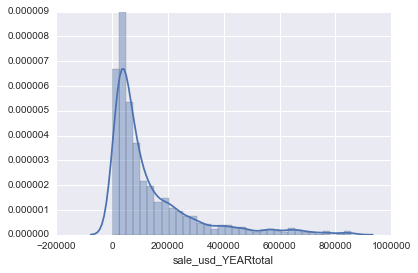

In [89]:
from scipy import stats
for i in ['bottles_sold_Q1mean',
 'sale_usd_Q1total',
 'volume_sold_liters_Q1mean',
 'sale_usd_YEARtotal']:
    sns.distplot(liq_2015[i][liq_2015[i] < liq_2015[i].quantile(.95)])
    plt.show()

Besides those outliers, mean bottles sold and mean liters sold are both pretty normally distributed. Sales, both on the quarter level and the year level, are severely right-skewed, but in almost identical ways

In [90]:
liq_2015.corr()

bottle_volume_ml_Q1mean  bottles_sold_Q1mean  \
bottle_volume_ml_Q1mean                        1.000000            -0.100393   
bottles_sold_Q1mean                           -0.100393             1.000000   
pack_Q1mean                                   -0.879757             0.084048   
sale_usd_Q1total                               0.083062             0.225043   
state_bottle_retail_usd_Q1mean                 0.524979             0.074816   
volume_sold_liters_Q1mean                      0.251953             0.884163   
sale_usd_YEARtotal                             0.087454             0.228245   

                                pack_Q1mean  sale_usd_Q1total  \
bottle_volume_ml_Q1mean           -0.879757          0.083062   
bottles_sold_Q1mean                0.084048          0.225043   
pack_Q1mean                        1.000000         -0.116818   
sale_usd_Q1total                  -0.116818          1.000000   
state_bottle_retail_usd_Q1mean    -0.651274          0.284174   
volume_sold_liters_Q1mean         -0.263612          0.332095   
sale_usd_YEARtotal                -0.123548          0.990392   

                                state_bottle_retail_usd_Q1mean  \
bottle_volume_ml_Q1mean                               0.524979   
bottles_sold_Q1mean                                   0.074816   
pack_Q1mean                                          -0.651274   
sale_usd_Q1total                                      0.284174   
state_bottle_retail_usd_Q1mean                        1.000000   
volume_sold_liters_Q1mean                             0.285835   
sale_usd_YEARtotal                                    0.300385   

                                volume_sold_liters_Q1mean  sale_usd_YEARtotal  
bottle_volume_ml_Q1mean                          0.251953            0.087454  
bottles_sold_Q1mean                              0.884163            0.228245  
pack_Q1mean                                     -0.263612           -0.123548  
sale_usd_Q1total                                 0.332095            0.990392  
state_bottle_retail_usd_Q1mean                   0.285835            0.300385  
volume_sold_liters_Q1mean                        1.000000            0.340054  
sale_usd_YEARtotal                               0.340054            1.000000

Q1 sales are *extremely* predictive of the year's sales. There is also a little correlation with average bottle cost, volume sold, and bottles sold - but I'm guessing that is mostly the case because of each of these variable's contributions to Q1 sales. I will see what happens when I put them in the model, but I doubt they will be much help. I think Q1 sales will be all I need. There are some other interesting, but at this point irrelevant, information.

## Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [91]:
from sklearn import metrics, linear_model
from sklearn.cross_validation import cross_val_score, cross_val_predict
import statsmodels.api as sm

r2, standard linear regression model:  0.98087723041
coefficients, standard linear regression model:  [ 0.          4.24666428]
cross-validated scores, standard linear regression model =  [ 0.98557768  0.95695269  0.91203368  0.98260737  0.95299061  0.93756628
  0.84353234  0.86597623  0.99862878  0.85704248]


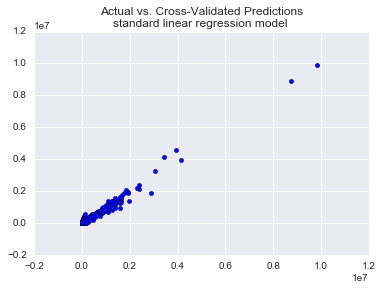






r2, lasso model:  0.980876249532
coefficients, lasso model:  [ 0.          4.24241762]
cross-validated scores, lasso model =  [ 0.98512877  0.95716703  0.91181015  0.98274373  0.95305095  0.93692395
  0.84309778  0.86531148  0.99867346  0.85672623]


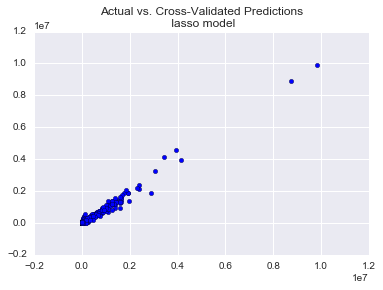






r2, ridge model:  0.980876142435
coefficients:  [ 0.          4.25113678]
cross-validated scores, ridge model =  [ 0.98562039  0.95700281  0.91206741  0.98271958  0.95294348  0.93715759
  0.84350261  0.86551284  0.99860855  0.8565989 ]


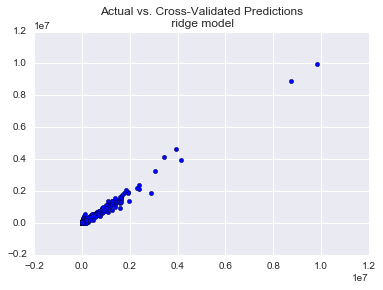

In [92]:
#making a model for 2015 data - starting with the simplest model, linreg
y = liq_2015.sale_usd_YEARtotal
X = liq_2015[['sale_usd_Q1total']]
X = sm.add_constant(X)

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'r2, standard linear regression model: ', model.score(X, y)
print 'coefficients, standard linear regression model: ', model.coef_

scores = cross_val_score(model, X, y, cv=10)
print "cross-validated scores, standard linear regression model = ", scores

plt.scatter(y, predictions)
plt.title('Actual vs. Cross-Validated Predictions\nstandard linear regression model ')
plt.show()
print '\n\n\n\n'


lm = linear_model.LassoCV()
model_lasso = lm.fit(X, y)
predictions_lasso = model_lasso.predict(X)

print 'r2, lasso model: ', model_lasso.score(X, y)
print 'coefficients, lasso model: ', model_lasso.coef_

scores = cross_val_score(model_lasso, X, y, cv=10)
print "cross-validated scores, lasso model = ", scores

plt.scatter(y, predictions_lasso)
plt.title('Actual vs. Cross-Validated Predictions\n lasso model')
plt.show()
print '\n\n\n\n'



lm = linear_model.RidgeCV()
model_ridge = lm.fit(X, y)
predictions_ridge = model_ridge.predict(X)

print 'r2, ridge model: ', model_ridge.score(X, y)
print 'coefficients: ', model_ridge.coef_

scores = cross_val_score(model_ridge, X, y, cv=10)
print "cross-validated scores, ridge model = ", scores

plt.scatter(y, predictions_ridge)
plt.title('Actual vs. Cross-Validated Predictions\n ridge model')
plt.show()


In [93]:
liq_2015.columns

Index([u'store_number', u'city', u'zip_code', u'county',
       u'bottle_volume_ml_Q1mean', u'bottles_sold_Q1mean', u'pack_Q1mean',
       u'sale_usd_Q1total', u'state_bottle_retail_usd_Q1mean',
       u'volume_sold_liters_Q1mean', u'sale_usd_YEARtotal'],
      dtype='object')

r2, standard linear regression model:  0.981344457682
coefficients, standard linear regression model:  [    0.             4.21013696  -536.20485955  1113.89112953  3177.8339077 ]
cross-validated scores, standard linear regression model =  [ 0.98410997  0.94649251  0.90527802  0.98282115  0.94916619  0.95271991
  0.85745467  0.83692531  0.99894008  0.84370615]


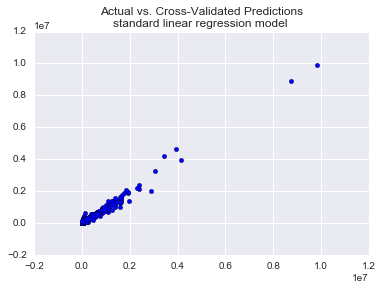






r2, lasso model:  0.980876249532
coefficients, lasso model:  [ 0.          4.24241762  0.          0.          0.        ]
cross-validated scores, lasso model =  [ 0.98512877  0.95716703  0.91181015  0.98274373  0.95305095  0.93692395
  0.84309778  0.86531148  0.99867346  0.85672623]


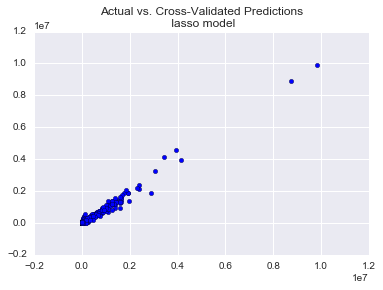






r2, ridge model:  0.981344457335
coefficients:  [    0.             4.21013641  -536.30443072  1114.1095803   3174.23736823]


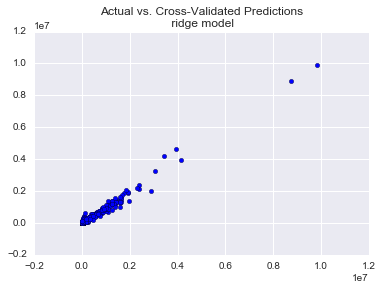

In [94]:
#adding a few variables
y = liq_2015.sale_usd_YEARtotal
X = liq_2015[['sale_usd_Q1total', 'bottles_sold_Q1mean', 'volume_sold_liters_Q1mean', 'state_bottle_retail_usd_Q1mean']]
X = sm.add_constant(X)

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

print 'r2, standard linear regression model: ', model.score(X, y)
print 'coefficients, standard linear regression model: ', model.coef_

scores = cross_val_score(model, X, y, cv=10)
print "cross-validated scores, standard linear regression model = ", scores

plt.scatter(y, predictions)
plt.title('Actual vs. Cross-Validated Predictions\nstandard linear regression model ')
plt.show()
print '\n\n\n\n'


lm = linear_model.LassoCV()
model_lasso = lm.fit(X, y)
predictions_lasso = model_lasso.predict(X)

print 'r2, lasso model: ', model_lasso.score(X, y)
print 'coefficients, lasso model: ', model_lasso.coef_

scores = cross_val_score(model_lasso, X, y, cv=10)
print "cross-validated scores, lasso model = ", scores

plt.scatter(y, predictions_lasso)
plt.title('Actual vs. Cross-Validated Predictions\n lasso model')
plt.show()
print '\n\n\n\n'



lm = linear_model.RidgeCV()
model_ridge = lm.fit(X, y)
predictions_ridge = model_ridge.predict(X)

print 'r2, ridge model: ', model_ridge.score(X, y)
print 'coefficients: ', model_ridge.coef_

scores = cross_val_score(model_ridge, X, y, cv=10)

plt.scatter(y, predictions_ridge)
plt.title('Actual vs. Cross-Validated Predictions\n ridge model')
plt.show()


The Lasso model eliminated all coefficients other than Q1 Sales. Taking that and the fact that the additional variables didn't add anything of benefit to the model, I will definitely leave them out and use only Q1 Sales. I would consider trying some categorical variables, but they all have too many categories to be considered (it would violate the goal of having 10-20x as many parameters as datapoints, and considering how good the model is as-is, it's not worth the risk of over-fitting)

The Ridge and Lasso models did not do anything to change the model - it was nearly identical! So I will proceed with the simplest model, the standard linear regression.

R2 score of 2015 model on 2014 data:  0.979624270173


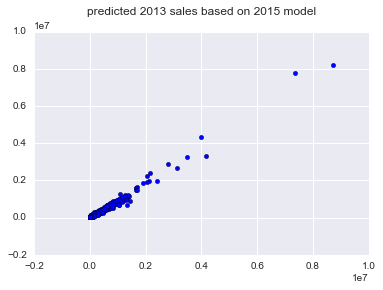

R2 score of 2015 model on 2013 data:  0.980226386907


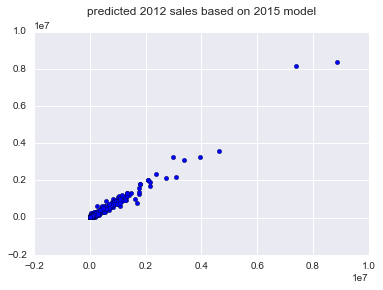

R2 score of 2015 model on 2012 data:  0.968970764634


In [95]:
# to check if the model fits on previous years' data:
#making a model for 2015 data - starting with the simplest model, linreg
y_2015 = liq_2015.sale_usd_YEARtotal
X_2015 = liq_2015[['sale_usd_Q1total']]
X_2015 = sm.add_constant(X_2015)

lm = linear_model.LinearRegression()
model = lm.fit(X_2015, y_2015)

X_2014 = liq_2014[['sale_usd_Q1total']][liq_2014.sale_usd_YEARtotal.notnull()]
X_2014 = sm.add_constant(X_2014)
y_2014 = liq_2014.sale_usd_YEARtotal[liq_2014.sale_usd_YEARtotal.notnull()]
predictions_2014 = model.predict(X_2014)


plt.scatter(y_2014, predictions_2014)
plt.title('predicted 2014 sales based on 2015 model\n')
plt.show()
print 'R2 score of 2015 model on 2014 data: ', model.score(X_2014, y_2014) 

X_2013 = liq_2013[['sale_usd_Q1total']][liq_2013.sale_usd_YEARtotal.notnull()]
X_2013 = sm.add_constant(X_2013)
y_2013 = liq_2013.sale_usd_YEARtotal[liq_2013.sale_usd_YEARtotal.notnull()]
predictions_2013 = model.predict(X_2013)


plt.scatter(y_2013, predictions_2013)
plt.title('predicted 2013 sales based on 2015 model\n')
plt.show()
print 'R2 score of 2015 model on 2013 data: ', model.score(X_2013, y_2013) 




X_2012 = liq_2012[['sale_usd_Q1total']][liq_2012.sale_usd_YEARtotal.notnull()]
X_2012 = sm.add_constant(X_2012)
y_2012 = liq_2012.sale_usd_YEARtotal[liq_2012.sale_usd_YEARtotal.notnull()]
predictions_2012 = model.predict(X_2012)


plt.scatter(y_2012, predictions_2012)
plt.title('predicted 2012 sales based on 2015 model\n')
plt.show()
print 'R2 score of 2015 model on 2012 data: ', model.score(X_2012, y_2012)


In [96]:
all_years = pd.concat([liq_2012, liq_2013, liq_2014, liq_2015])

R2 score of 2015 model on 2014 data:  0.980830025815







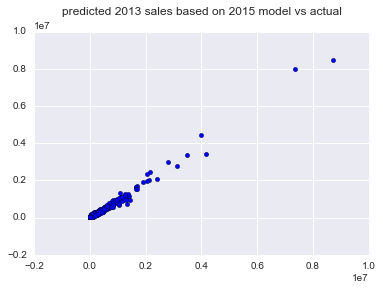

R2 score of 2015 model on 2013 data:  0.982397164202







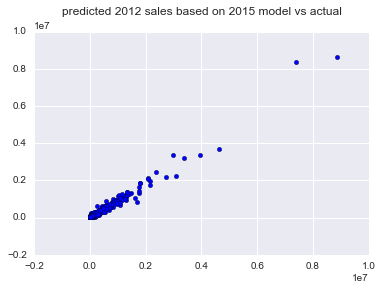

R2 score of 2015 model on 2012 data:  0.97194458044





cross-validated scores for the 2015 model on all years' data [ 0.96930502  0.89829335  0.97826988  0.97506112  0.98451429  0.96995665
  0.98567274  0.97617592  0.96784252  0.98322641]


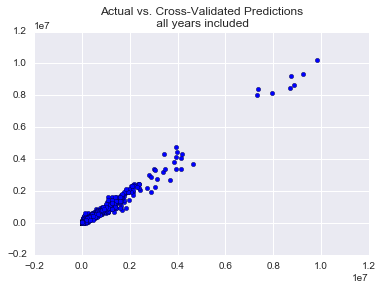

In [97]:
# to check if the model fits on previous years' data:
#making a model for 2015 data - starting with the simplest model, linreg
y_all = all_years.sale_usd_YEARtotal[all_years.sale_usd_YEARtotal.notnull()]
X_all = all_years[['sale_usd_Q1total']][all_years.sale_usd_YEARtotal.notnull()]
X_all = sm.add_constant(X_all)

lm = linear_model.LinearRegression()
model = lm.fit(X_all, y_all)

X_2014 = liq_2014[['sale_usd_Q1total']][liq_2014.sale_usd_YEARtotal.notnull()]
X_2014 = sm.add_constant(X_2014)
y_2014 = liq_2014.sale_usd_YEARtotal[liq_2014.sale_usd_YEARtotal.notnull()]
predictions_2014 = model.predict(X_2014)


plt.scatter(y_2014, predictions_2014)
plt.title('predicted 2014 sales based on 2015 model vs actual\n')
plt.show()
print 'R2 score of 2015 model on 2014 data: ', model.score(X_2014, y_2014) 


print '\n\n\n\n'

X_2013 = liq_2013[['sale_usd_Q1total']][liq_2013.sale_usd_YEARtotal.notnull()]
X_2013 = sm.add_constant(X_2013)
y_2013 = liq_2013.sale_usd_YEARtotal[liq_2013.sale_usd_YEARtotal.notnull()]
predictions_2013 = model.predict(X_2013)


plt.scatter(y_2013, predictions_2013)
plt.title('predicted 2013 sales based on 2015 model vs actual\n')
plt.show()
print 'R2 score of 2015 model on 2013 data: ', model.score(X_2013, y_2013) 


print '\n\n\n\n'

X_2012 = liq_2012[['sale_usd_Q1total']][liq_2012.sale_usd_YEARtotal.notnull()]
X_2012 = sm.add_constant(X_2012)
y_2012 = liq_2012.sale_usd_YEARtotal[liq_2012.sale_usd_YEARtotal.notnull()]
predictions_2012 = model.predict(X_2012)

plt.scatter(y_2012, predictions_2012)
plt.title('predicted 2012 sales based on 2015 model vs actual\n')
plt.show()
print 'R2 score of 2015 model on 2012 data: ', model.score(X_2012, y_2012)



print '\n\n\n\n'


all_model_predictions = model.predict(X_all)
scores = cross_val_score(model, X_all, y_all, cv=10)
print "cross-validated scores for the 2015 model on all years' data", scores

plt.scatter(y_all, all_model_predictions)
plt.title('Actual vs. Cross-Validated Predictions\n all years included')
plt.show()

The 2015 model actually applies pretty well for every year. I feel confident in applying it to my 2016 data.

In [98]:
# To provide a model summary and double-check for any red-flags:
sm.OLS(y_2015, X_2015).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sale_usd_YEARtotal   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.576e+04
Date:                Tue, 15 Nov 2016   Prob (F-statistic):               0.00
Time:                        14:09:15   Log-Likelihood:                -16174.
No. Observations:                1284   AIC:                         3.235e+04
Df Residuals:                    1282   BIC:                         3.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8408.3713   2156.868      3.898      0.000    4176.993    1.26e+04
sale_usd_Q1total     4.2467      0.017    256.434      0.000       4.214       4.279
==============================================================================
Omnibus:                      921.253   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181676.022
Skew:                           2.316   Prob(JB):                         0.00
Kurtosis:                      61.089   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
# drop the total year variable, because it is incomplete and it is what we are trying to predict.
liq_2016.drop('sale_usd_YEARtotal', axis=1, inplace=True)


In [100]:
# application of the model
lm = linear_model.LinearRegression()
final_model = lm.fit(X_2015, y_2015)

predictions_2015 = final_model.predict(X_2015)

X_2016 = liq_2016[['sale_usd_Q1total']]
X_2016 = sm.add_constant(X_2016)

predictions_2016 = final_model.predict(X_2016)

In [101]:
liq_2015['predicted_2015_sales_usd'] = pd.Series(predictions)

In [102]:
liq_2015.to_csv('2015_sales_usd_plus_predictions.csv')

In [103]:
liq_2016['predicted_2016_sales_usd'] = pd.Series(predictions_2016)

In [104]:
liq_2016.to_csv('predicted_2016_sales.csv')

## Alternate model using just county data, looking at month-by-month.

In [105]:
month_dummies = pd.get_dummies(liq.month, prefix='month')
liq = pd.concat([liq, month_dummies], axis=1).head()

In [106]:
liq.dtypes

date                       datetime64[ns]
store_number                       object
city                               object
zip_code                           object
category                           object
pack                                int64
bottle_volume_ml                    int64
bottles_sold                        int64
volume_sold_liters                float64
state_bottle_retail_usd           float64
sale_usd                          float64
county                             object
month                               int64
year                                int64
month_1                           float64
month_2                           float64
month_3                           float64
month_4                           float64
month_5                           float64
month_6                           float64
month_7                           float64
month_8                           float64
month_9                           float64
month_10                          

In [107]:
liq['q1'] = liq.month_1 + liq.month_2 + liq.month_3

In [108]:
liq['q1'].value_counts()
liq['q1_sales_usd'] = liq.q1 * liq.sale_usd

liq['jan_sales_usd'] = liq.month_1 * liq.sale_usd
liq['feb_sales_usd'] = liq.month_2 * liq.sale_usd
liq['mar_sales_usd'] = liq.month_3 * liq.sale_usd

In [109]:
liq[liq.month <= 3].head()

Empty DataFrame
Columns: [date, store_number, city, zip_code, category, pack, bottle_volume_ml, bottles_sold, volume_sold_liters, state_bottle_retail_usd, sale_usd, county, month, year, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, q1, q1_sales_usd, jan_sales_usd, feb_sales_usd, mar_sales_usd]
Index: []

In [110]:
by_county_2015 = pd.pivot_table(liq[['county', 'sale_usd', 'year', 'q1_sales_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd']][liq.year==2015], index='county', values=['sale_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd', 'q1_sales_usd'], aggfunc='sum')

In [111]:
by_county_2015.head()

feb_sales_usd  jan_sales_usd  mar_sales_usd  q1_sales_usd  sale_usd
county                                                                      
johnson            0.0            0.0            0.0           0.0    160.02
lee                0.0            0.0            0.0           0.0    182.04
page               0.0            0.0            0.0           0.0    325.68
tama               0.0            0.0            0.0           0.0     19.20

In [112]:
by_county_2012 = pd.pivot_table(liq[['county', 'sale_usd', 'year', 'q1_sales_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd']][liq.year==2012], index='county', values=['sale_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd', 'q1_sales_usd'], aggfunc='sum')

In [113]:
by_county_2013 = pd.pivot_table(liq[['county', 'sale_usd', 'year', 'q1_sales_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd']][liq.year==2013], index='county', values=['sale_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd', 'q1_sales_usd'], aggfunc='sum')

In [114]:
by_county_2014 = pd.pivot_table(liq[['county', 'sale_usd', 'year', 'q1_sales_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd']][liq.year==2014], index='county', values=['sale_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd', 'q1_sales_usd'], aggfunc='sum')

In [115]:
by_county_2016 = pd.pivot_table(liq[['county', 'year', 'q1_sales_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd']][liq.year==2016], index='county', values=['sale_usd', 'jan_sales_usd', 'feb_sales_usd', 'mar_sales_usd', 'q1_sales_usd'], aggfunc='sum')

In [117]:
# using LassoCV to see which variable it keeps in and which it kicks out, to determine strongest model.
X_2015c = by_county_2015[['feb_sales_usd', 'jan_sales_usd', 'mar_sales_usd', 'q1_sales_usd']]
X_2015c = sm.add_constant(X_2015c)
y_2015c = by_county_2015.sale_usd

lm = linear_model.LassoCV()
model_by_county_2015 = lm.fit(X_2015c, y_2015c)
print "model score: ", model_by_county_2015.score(X_2015c, y_2015c)
print "coefficients: ", model_by_county_2015.coef_

print cross_val_score(model_by_county_2015, X_2015c, y_2015c, cv=4)
print 'mean: ', cross_val_score(model_by_county_2015, X_2015c, y_2015c, cv=4).mean()

model score:  0.0
coefficients:  [ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.]
mean:  0.0


In [119]:
# testing the same model as a linear regression
X_2015c = by_county_2015['q1_sales_usd']
X_2015c = sm.add_constant(X_2015c)

lm = linear_model.LinearRegression()
model_by_county_2015 = lm.fit(X_2015c, y_2015c)
print "model score: ", model_by_county_2015.score(X_2015c, y_2015c)
print "coefficients: ", model_by_county_2015.coef_

print cross_val_score(model_by_county_2015, X_2015c, y_2015c, cv=4)
print 'mean: ', cross_val_score(model_by_county_2015, X_2015c, y_2015c, cv=4).mean()

model score:  0.0
coefficients:  [ 0.  0.]
[ 0.  0.  0.  0.]
mean:  0.0


Standard Linear Regression actually slightly out-performs the lasso model on cross-validation, so I will use the Linear Regression model (although the differences are nearly nothing)

In [120]:
# model summary:
sm.OLS(y_2015c, X_2015c).fit().summary()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.6-x86_64.egg/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sale_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 15 Nov 2016   Prob (F-statistic):                nan
Time:                        14:12:28   Log-Likelihood:                -24.428
No. Observations:                   4   AIC:                             50.86
Df Residuals:                       3   BIC:                             50.24
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          171.7350     62.723      2.738      0.071     -27.876     371.346
q1_sales_usd          0          0        nan        nan           0           0
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.437
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.174
Skew:                           0.019   Prob(JB):                        0.917
Kurtosis:                       1.980   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [121]:
by_county_2015['2015_predicted'] = model_by_county_2015.predict(X_2015c)

In [122]:
by_county_2015['percent_off'] = (by_county_2015.sale_usd - by_county_2015['2015_predicted'])/by_county_2015.sale_usd

In [123]:
by_county_2015.to_csv('by_county_2015.csv')

In [124]:
by_county_2015.sale_usd.sum()

686.94

In [125]:
liq_2015.sale_usd_YEARtotal.sum()

278340275.3000008

### I discovered by doing this that a model based on counties instead of based on stores is a slightly better model. My hypothesis is this may have something to do with the store openings and closings. I imagine stores open and close fairly regularly but that doesn't impact *overall* sales in that county (after all, I would imagine the demand for alcohol doesn't change much just because a store opens or closes, and someone will shop at any open stores in their area if they want their liquor). The model based on just store sales will be less able to account for the openings and closings of stores. I would also be more confident in this model because less information has to be eliminated for having missing data.

### However, since the assignment asked for us to do this by store, I'll use that model in my presentation.

## Present the Results

Present your conclusions and results, including a Tableau Storyboard. If you have more than one interesting model feel free to include.

blog link: https://cpleasants.github.io/blog/2016/11/15/the-art-of-keeping-it-simple

In [126]:
%%html
<div class='tableauPlaceholder' id='viz1479221513435' style='position: relative'><noscript><a href='#'><img alt='Story Title ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;8H&#47;8H2BDDMYZ&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='shared&#47;8H2BDDMYZ' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;8H&#47;8H2BDDMYZ&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1479221513435');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='820px';vizElement.style.height='733px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Score | 26/24
----|----
Identify: Problem Statement and Risks | 2
Acquire: Import with Pandas| 3
Parse: EDA | 3
Mine: Create columns/clean/format/process data| 3
Refine: Determine outliers and distribution, correlation, & statistical analysis| 3
Model: Create linear models; calculate probabilities, evaluate model, perform CV| 3
Present: Create executive summary, present findings, summarize, tailored for your audience| 3
Present: Blog | 3
Bonus: perform Ridge and Lasso regularization and explain what they do | 3

In [ ]:
#AT - nice job! next time try to make your code more compact and fix all the little code errors.